1. Supervised - regression, classification

2. UnSupervised - model is trained on unlabelled data. Model tries to find patterns/relationships in the data.

Categories of unsupervised:
1. Clustering: classify objects into different groups. Partitions a dataset into subsets. Data in each subset share common trait - some defined distance.

Sub-categories of clustering: 
1. Hierarchical 
2. Partitioning - KMeans

# KMeans

K - number of clusters

Name, Age, Town, Income 

Steps: 

1. K = 3. 3 Centroids/center points
Initial centroids
- 1st cluster - 20000
- 2nd cluster - 50000
- 3rd cluster - 80000

2. Compute distance of every data point from centroids and cluster them
- 100000, 35000, 27000, 65000, 5000
    3rd    1st    1st  3rd/2nd  1st

27000 - 20000 = 7000 - least - 1st cluster
27000 - 50000 = 23000
27000 - 80000 = 53000

65000 - 20000 = 45000
65000 - 50000 = 15000 - least
65000 - 80000 = 15000


3. Adjust the centroids so that they become the middle point
 - 1st - 35000, 27000, 5000 = (35000 + 27000 + 5000)/3 = new centroid 
 - 2nd - 65000 = 65000 
 - 3rd - 100000 = 100000

Repeat step 2 and 3 till the value of the centroids do not change

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler # scales our datapoints - 0-1

In [7]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


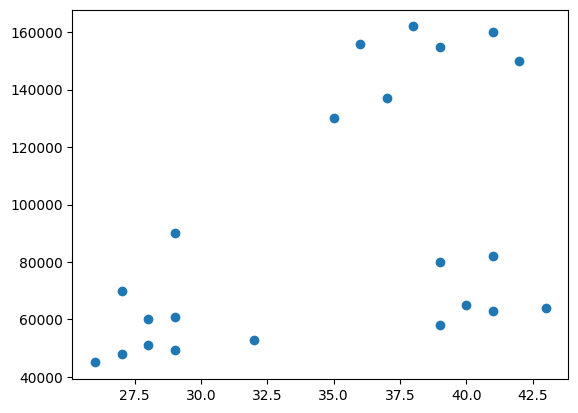

In [3]:
plt.scatter(df.Age, df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)

string da

In [10]:
y_predictions = km.fit_predict(df[['Age','Income($)']])

In [11]:
df['Cluster'] = y_predictions

In [12]:
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [14]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

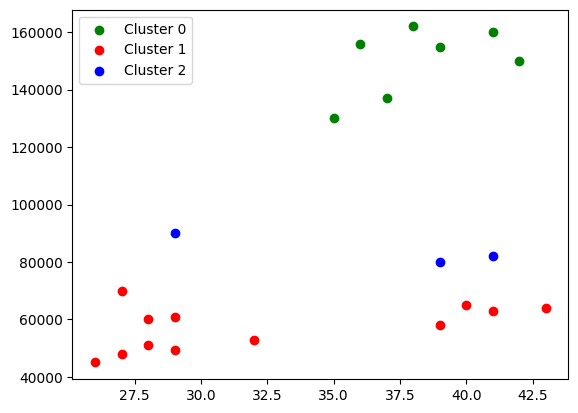

In [19]:
plt.scatter(df0.Age, df0['Income($)'],color='green',label='Cluster 0')
plt.scatter(df1.Age, df1['Income($)'],color='red',label='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'],color='blue',label='Cluster 2')
plt.legend()

In [12]:
## Use the MinMaxScaler to scale our data points
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

In [25]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [5]:
km = KMeans(n_clusters=3)

In [27]:
y_predictions = km.fit_predict(df[['Age','Income($)']])

In [28]:
df['Cluster'] = y_predictions

In [29]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

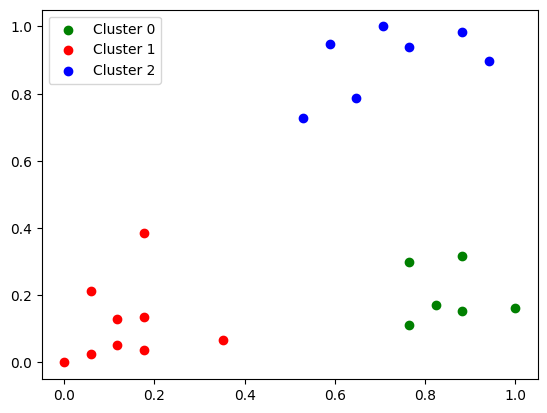

In [30]:
plt.scatter(df0.Age, df0['Income($)'],color='green',label='Cluster 0')
plt.scatter(df1.Age, df1['Income($)'],color='red',label='Cluster 1')
plt.scatter(df2.Age, df2['Income($)'],color='blue',label='Cluster 2')
plt.legend()

In [13]:
# finding the optimal k value
# Elbow method
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

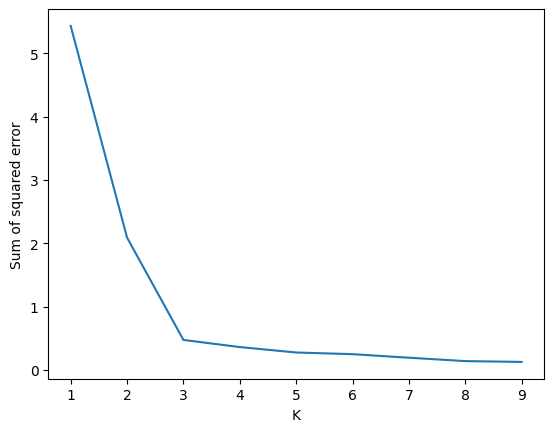

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

    The figure above shows the elbow plot of our dataset. We look at the point where the curve makes a sharp turn/corner. In the above case, it is at point 3. Therefore, value 3 is our optimal k 